<a href="https://colab.research.google.com/github/Rahman88talha/Capstone-Customer_Segmentation_Clustering/blob/main/Capstone_Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Project Unsupervised-Clustering/Online Retail.xlsx') # reading our data

In [4]:
df.head() # looking into data set & their shape

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Checking Null Values in dataset

In [8]:
# Total null values in each of the columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Here, we have Null data in two columns: Description & Customer Id

We will remove these null values one by one

In [9]:
# Dropping the null values from description & Customer ID column
df.dropna(subset = ['Description'], inplace = True)
df.dropna(subset=['CustomerID'], axis = 0, inplace = True)

In [10]:
#checking null value
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

hence Null Values has been dropped

In [11]:
# Checking the totol number of duplicate values 
print('Duplicate values:',len(df[df.duplicated()]))

# Dropping the duplicate values from the dataset
df.drop_duplicates(inplace = True)

Duplicate values: 5225


In [12]:
df1 = df.copy() # copy of original dataset
df1.shape

(401604, 8)

After dropping null and duplicate values we see that 401604 rows and 8 columns are there in this dataset.

In [13]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Droping all the cancelled record

In [14]:
# Converting the column to a string type to detect 'C'
df1['InvoiceNo'] = df1['InvoiceNo'].astype('str')
df1=df1[~df1['InvoiceNo'].str.contains('C')]

we have drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

In [15]:
# Converting the Invoice no column back to a numerical type
df1['InvoiceNo'] = df1['InvoiceNo'].apply(int)

In [16]:
print("Number of transactions: ", df1['InvoiceNo'].nunique())          # Total unique transactions 
print("Number of products bought: ", df1['StockCode'].nunique())       # Total no. of unique products bought 
print("Number of customers:", df1['CustomerID'].nunique())             # Total no. of unique customers 
print('Number of countries: ', df1['Country'].nunique())               # Total no. of unique countries  

Number of transactions:  18536
Number of products bought:  3665
Number of customers: 4339
Number of countries:  37


## Exploratory Data Analysis (EDA)

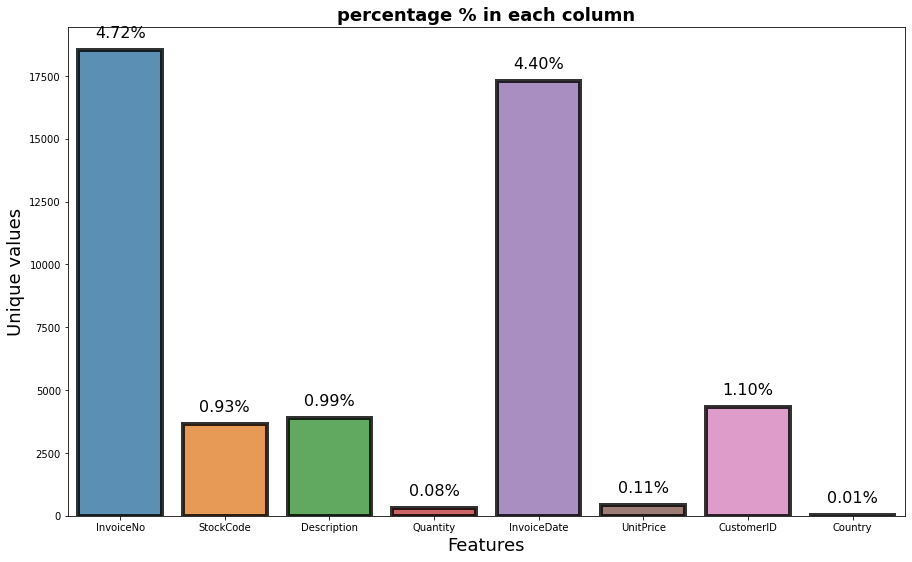

In [17]:
unique_featues_df = pd.DataFrame()
unique_featues_df['Features']=df1.columns
unique=[]
for i in df1.columns:
  unique.append(df1[i].nunique())
unique_featues_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,9))

splot = sns.barplot(x=unique_featues_df['Features'], y=unique_featues_df['Uniques'], alpha=0.8, edgecolor = 'black', lw = 4)
for p in splot.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df1.shape[0]*100),ha = "center", SIZE = 16)
    
plt.title('percentage % in each column', weight='bold', size=18)
plt.ylabel('Unique values', size=18)
plt.xlabel('Features', size=18)
plt.show()

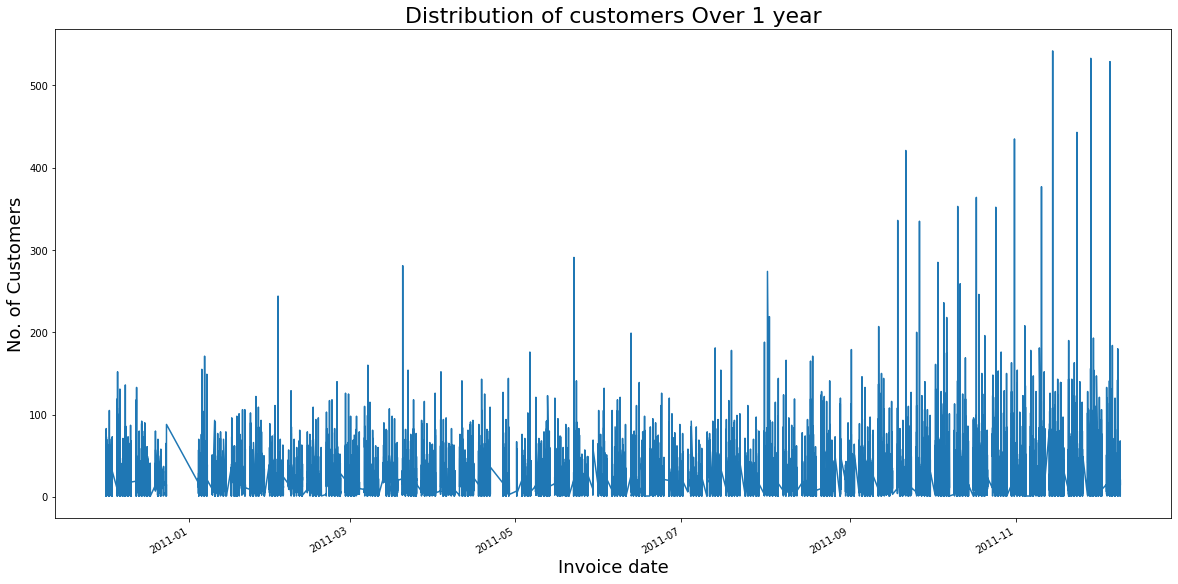

In [18]:
# customer distribution in 1 year time period
plt.figure(figsize=(20,10))
customer_distribution = df1.groupby('InvoiceDate').count()['CustomerID'].plot()
plt.title('Distribution of customers Over 1 year', size=22)
plt.xlabel('Invoice date', size=18)
plt.ylabel('No. of Customers', size=18)
plt.show()

Let's explore Country on the basis of maximum order

In [19]:
# Top 10 countries who's buying maximum products
Top_10_country = df1['Country'].value_counts().reset_index()
Top_10_country['Country %']= Top_10_country['Country']*100/df1['Country'].count()     # Adding country percentage column to top 10 countries data frame
Top_10_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_10_country[:10]

,Country_Name,Count,Country %
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474
5,Netherlands,2363,0.601683
6,Belgium,2031,0.517147
7,Switzerland,1842,0.469022
8,Portugal,1453,0.369972
9,Australia,1184,0.301478


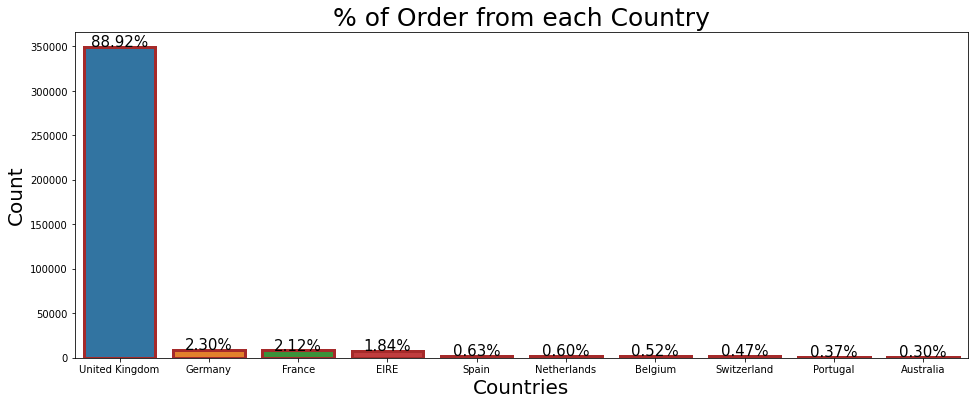

In [20]:
fig, ax = plt.subplots(figsize = (16,6))
splot = sns.barplot(x='Country_Name',y='Count',data=Top_10_country[:10], edgecolor = 'brown', lw = 3)
plt.title('% of Order from each Country', SIZE = 25)
plt.xlabel('Countries', SIZE = 20)
plt.ylabel('Count', SIZE = 20)
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df1.shape[0]*100),ha = "center", SIZE = 15)

Maximum orders are recieved from United Kingdom

In [21]:
# Creating amount column by multiply quantity with unitprice
df1['Amount'] = df1.Quantity*df1.UnitPrice

# Checking which CustomerID spend maximum amount.
PercentSales = df1.groupby(["CustomerID"]).Amount.sum().sort_values(ascending = False).iloc[:10].reset_index()
PercentSales

,CustomerID,Amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


Text(0.5, 1.0, 'Big order CustomerID')

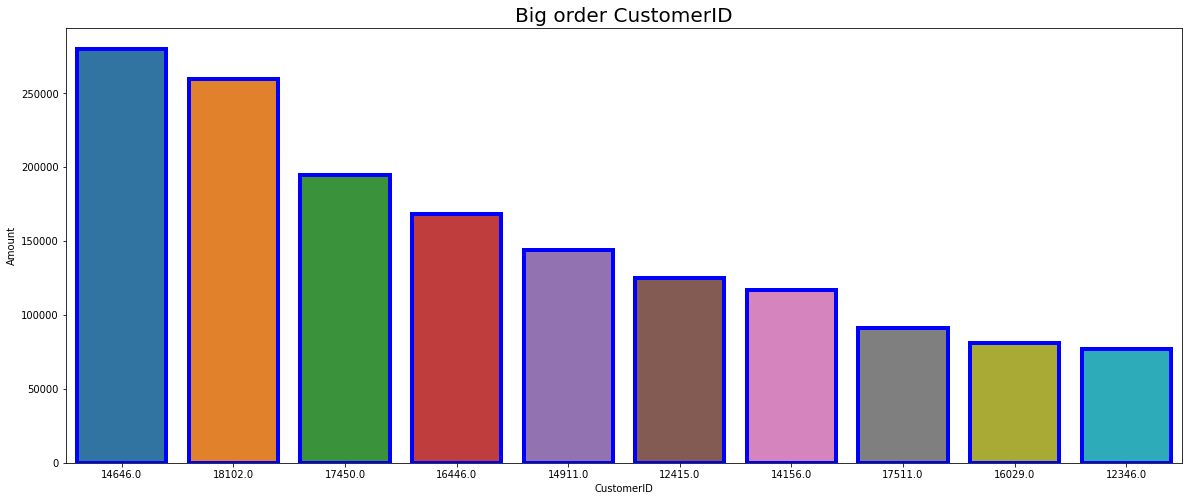

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x="CustomerID", y="Amount", data = PercentSales, order = PercentSales['CustomerID'], edgecolor = 'blue', lw = 4)
plt.title('Big order CustomerID', size = 20)

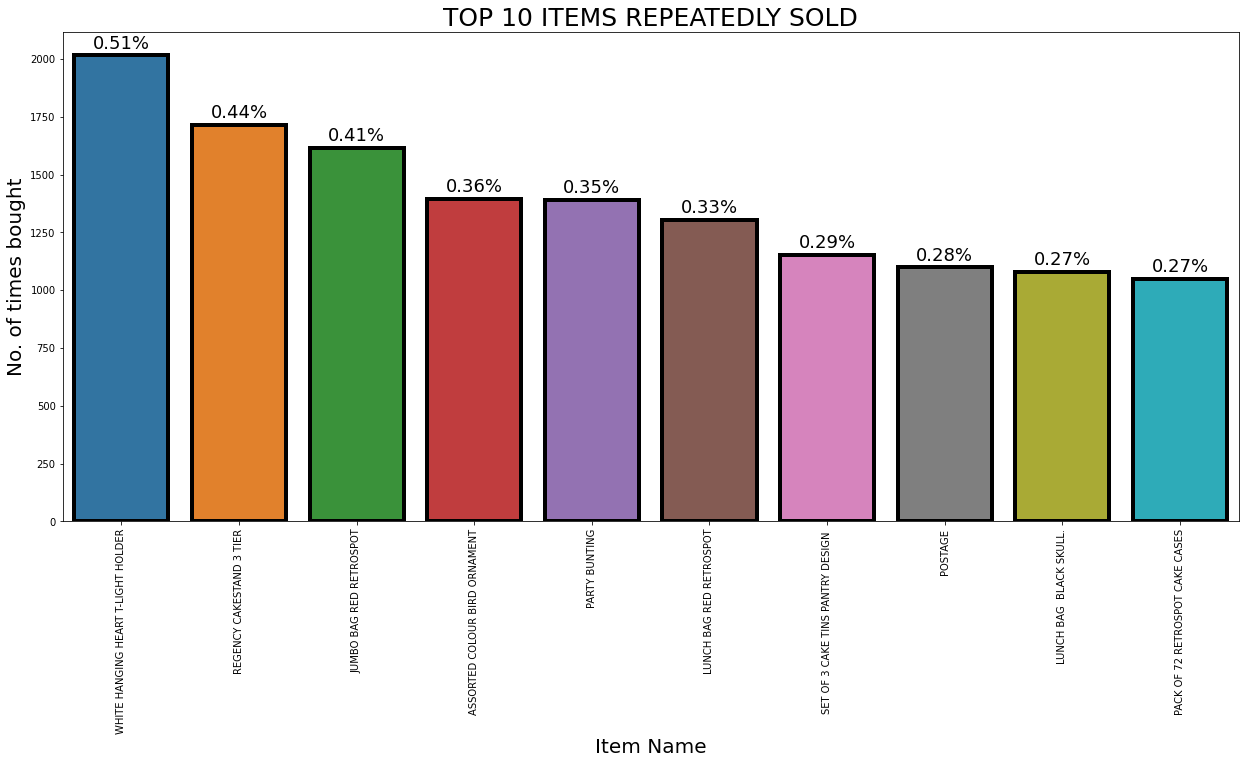

In [23]:
product_df = df1['Description'].value_counts().reset_index()
product_df.rename(columns={'index': 'Description_Name','Description': 'Count'}, inplace=True)

# Barplot of the top 10 most repeatedly sold items
fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x='Description_Name',y='Count',data = product_df[:10], edgecolor = 'black',lw =4)
plt.xlabel('Item Name', SIZE = 20)
plt.ylabel('No. of times bought', SIZE = 20)
plt.title('TOP 10 ITEMS REPEATEDLY SOLD', SIZE = 25)
plt.tight_layout()
plt.xticks(rotation = 90)   # by using xticks we rotate our column labels to 90 degree.
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+30, '{:1.2f}''%'.format(height/df1.shape[0]*100),ha = "center", SIZE = 18)

WHITE HANGING HEART T-LIGHT HOLDER is among the top product which were reretedly sold

Now, Checking the distribution of numerical column to understand the data distribution is whether positively skewed, negative skewed or symetric.

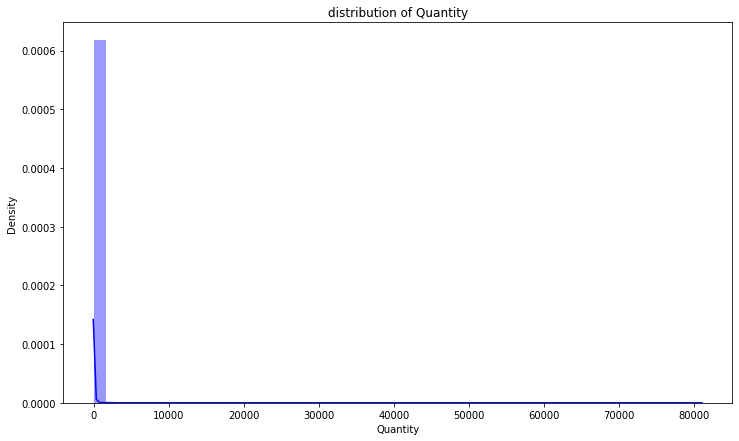

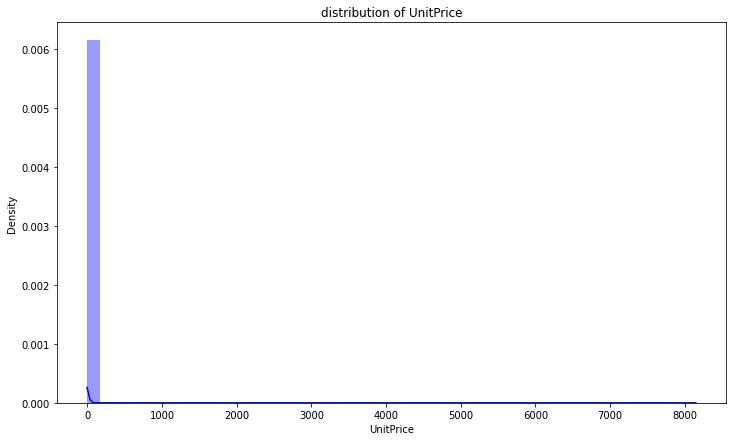

In [24]:
#distribution of Quantity
plt.figure(figsize=(12,7))
plt.title('distribution of Quantity')
sns.distplot(df1['Quantity'],color="Blue")

#distribution of UnitPrice
plt.figure(figsize=(12,7))
plt.title('distribution of UnitPrice')
sns.distplot(df1['UnitPrice'],color="Blue")

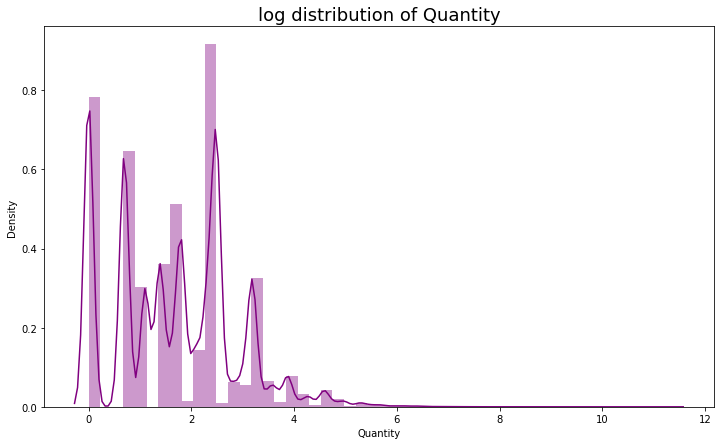

In [25]:
#Log transformation on distribution of Quantity 
plt.figure(figsize=(12,7))
plt.title('log distribution of Quantity', SIZE =18)
sns.distplot(np.log(df1['Quantity']),color="Purple")

Now it is better to understand the distibution of quantity & unit price column

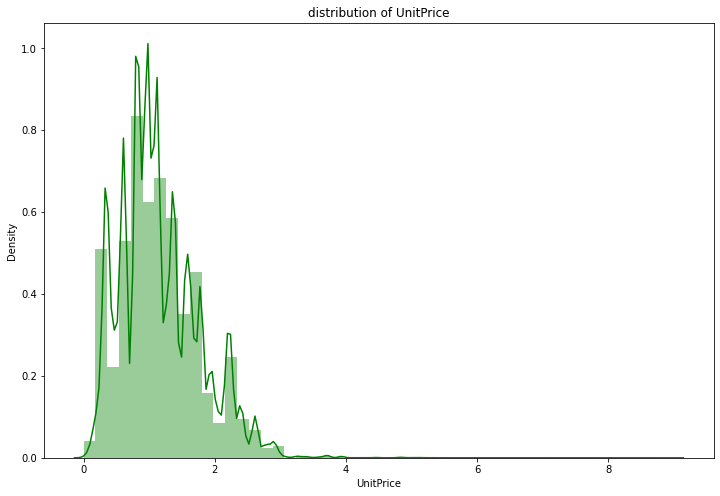

In [26]:
plt.figure(figsize=(12,8))
plt.title('distribution of UnitPrice')
sns.distplot(np.log1p(df1['UnitPrice']),color="G")

In [27]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   Amount       392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.0+ MB


In [29]:
import datetime as dt
# Using the Invoice date column to extract 
df1['Day'] = df1['InvoiceDate'].dt.day
df1['Month'] = df1['InvoiceDate'].dt.month
df1['Year'] = df1['InvoiceDate'].dt.year

In [30]:
# Extracting new feature from Invoice Date
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"], format="%Y-%m-%d %H:%M")
df1['Day'] = df1['InvoiceDate'].dt.day_name()        # gives the name of the days like monday,tuesday,...

df1["year"] = df1["InvoiceDate"].apply(lambda x: x.year)
df1["month_num"] = df1["InvoiceDate"].apply(lambda x: x.month)
df1["day_num"] = df1["InvoiceDate"].apply(lambda x: x.day)
df1["hour"] = df1["InvoiceDate"].apply(lambda x: x.hour)
df1["minute"] = df1["InvoiceDate"].apply(lambda x: x.minute)
df1['Month']=df1['InvoiceDate'].dt.month_name()  # Creating new feature Month which gives the month like january, february, etc.
df1[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Day,Month,Year,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,2010,12,1,8,26
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,Wednesday,December,2010,2010,12,1,8,26
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,Wednesday,December,2010,2010,12,1,8,26
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,December,2010,2010,12,1,8,28
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,December,2010,2010,12,1,8,28
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,Wednesday,December,2010,2010,12,1,8,34


Checking Sales- Day-wise

In [31]:
# on which day most of the order is placed 
day_df = df1['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name','Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


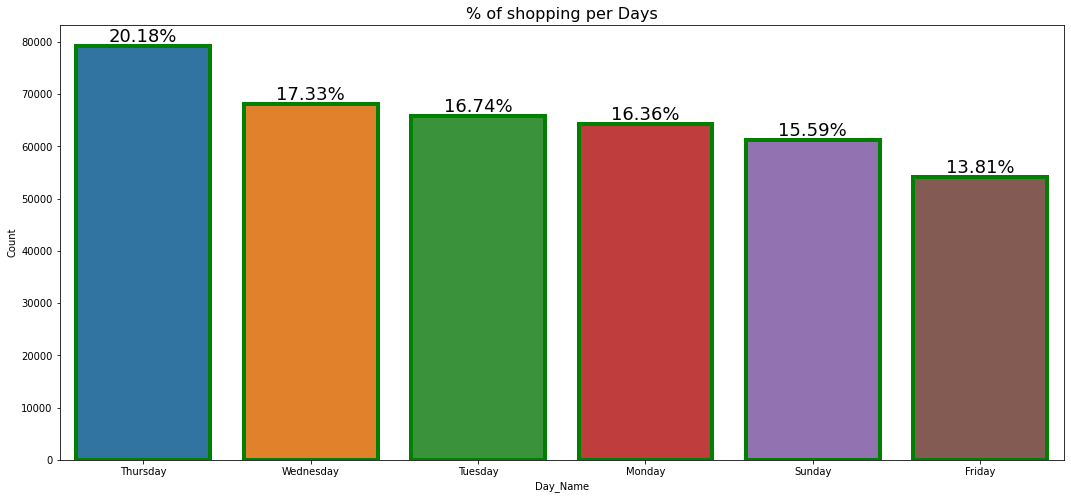

In [32]:
# Plot the number of shopping days-wise
fig, ax = plt.subplots(figsize = (18,8))
plt.title('% of shopping per Days', SIZE= 16)
sns.barplot(x= 'Day_Name', y='Count',data=day_df, edgecolor = 'green', lw=4)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/df1.shape[0]*100),ha = "center", SIZE = 18)

Maximum number of shopping on Thursday,Wednesday and Tuesday.

Now, Month-wise

In [33]:
# Monthly purchases
month_df = df1['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name','Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


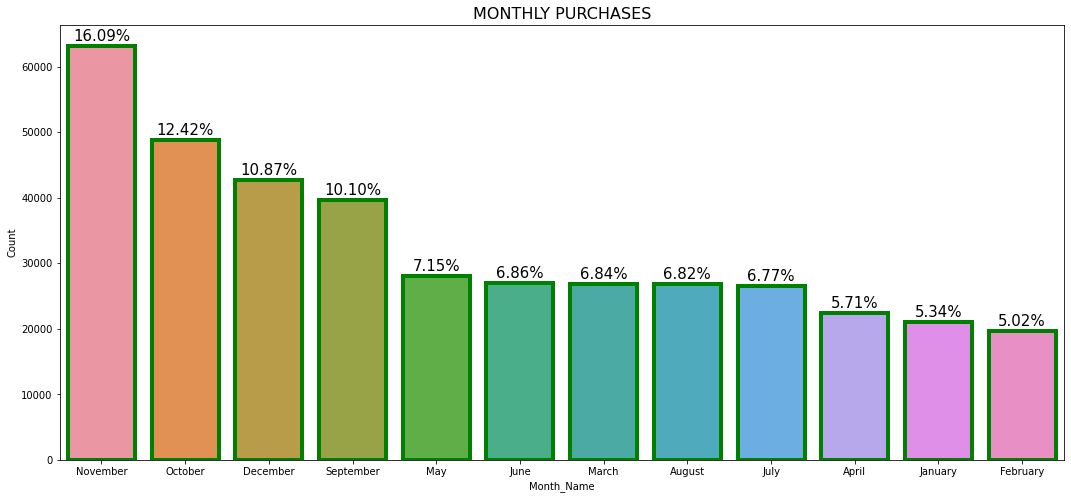

In [34]:
fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x='Month_Name',y='Count',data = month_df, edgecolor = 'green', lw=4)
plt.title('MONTHLY PURCHASES', SIZE = 16)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/df1.shape[0]*100),ha = "center", SIZE = 15)

November & October Tops the list whereas January and February resids at the bottom

In [35]:
hour_df=df1['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793
5,10,37775
6,16,23719
7,9,21928
8,17,12942
9,8,8688


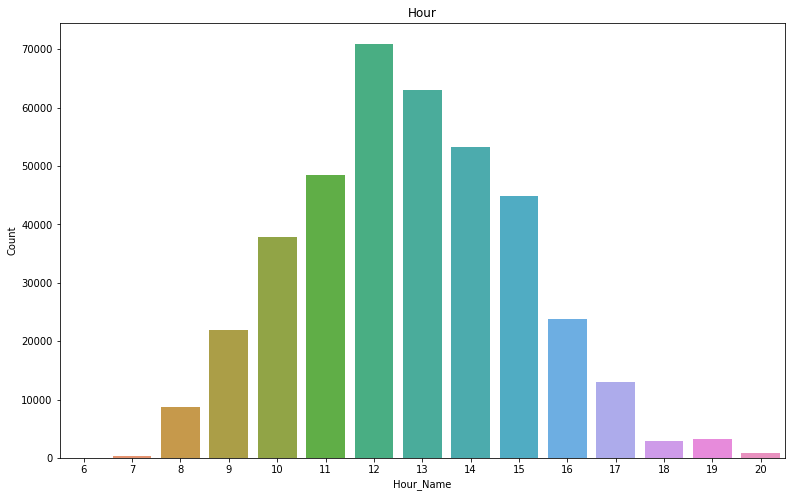

In [36]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

###**AfterNooon Time most of the customers have purchased the item.**

Text(0.5, 1.0, 'CORRELTAION MATRIX')

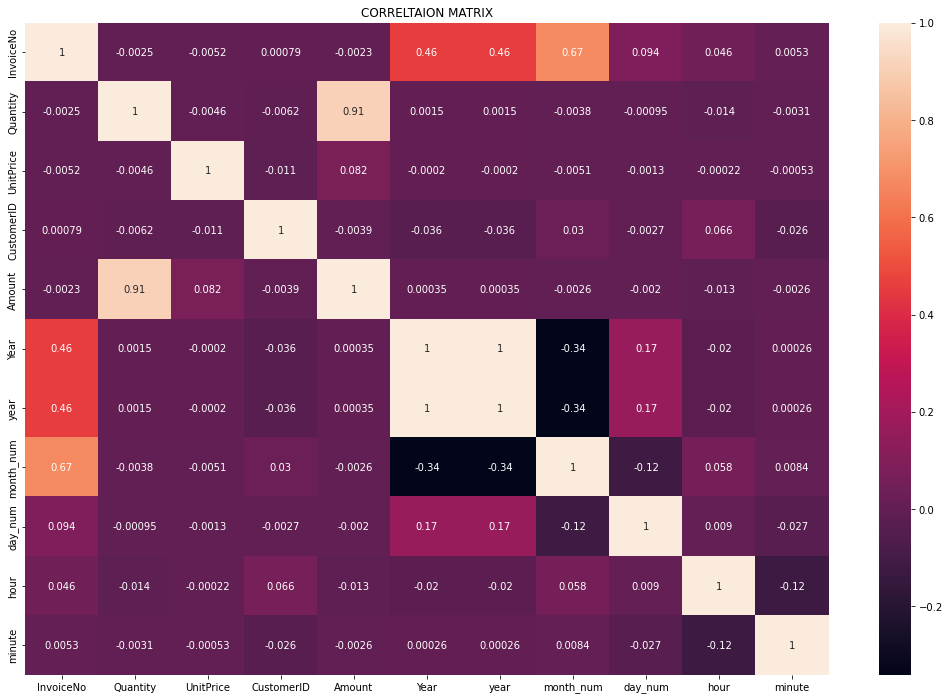

In [37]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(df1.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

#**Create the RFM model (Recency, Frequency,Monetary value)**

###Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

###Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ...
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

###Calculating RFM scores

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [38]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [39]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

In [40]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

In [41]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

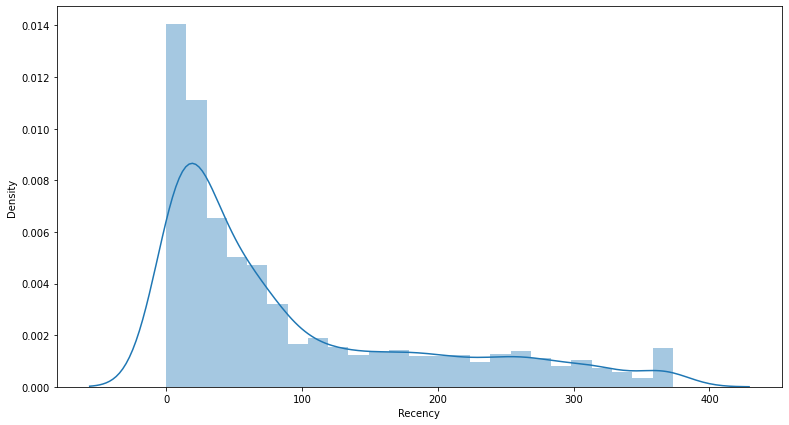

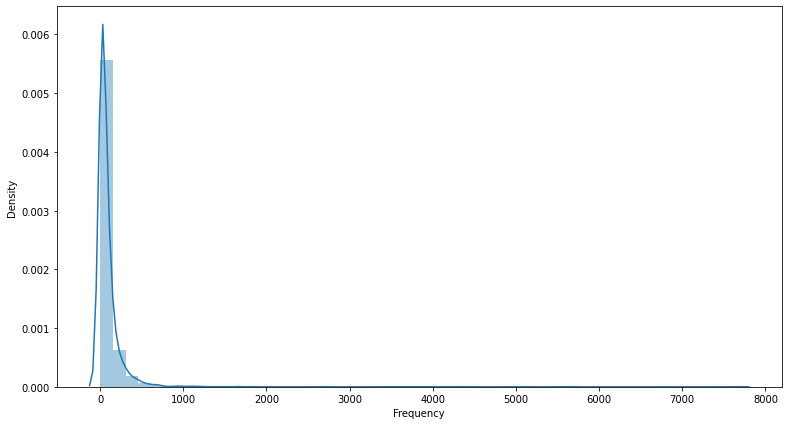

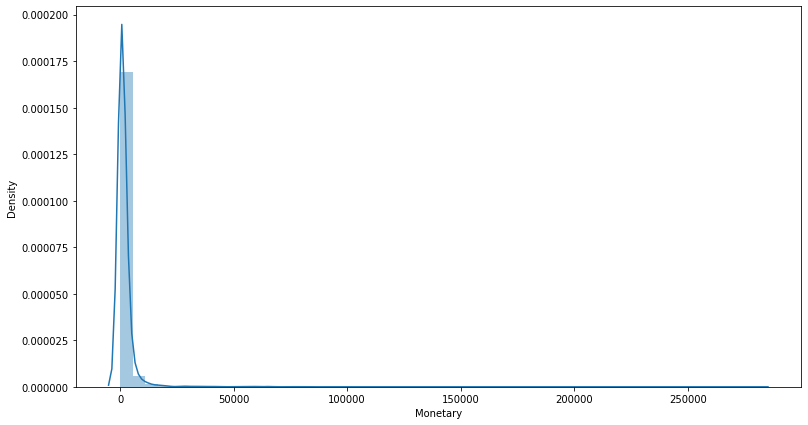

In [42]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,7))
sns.distplot(x)

#Frequency distribution plot
x = rfm_df['Frequency']
plt.figure(figsize=(13,7))
sns.distplot(x)

#Monetary distribution plot
x = rfm_df['Monetary']
plt.figure(figsize=(13,7))
sns.distplot(x)

All distplots are right skewed data or positively skewed. 
From recency its says that there is a huge set of customer who comes very frequently to purchase.

In [43]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
        
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

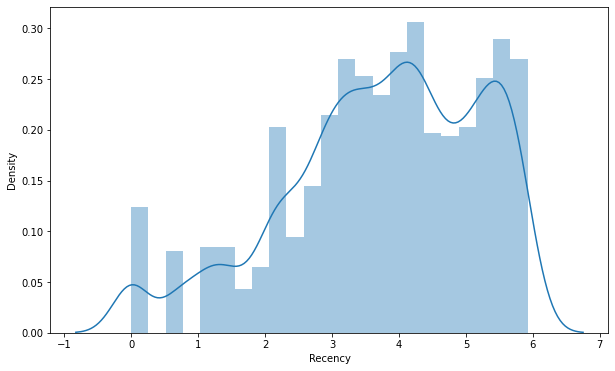

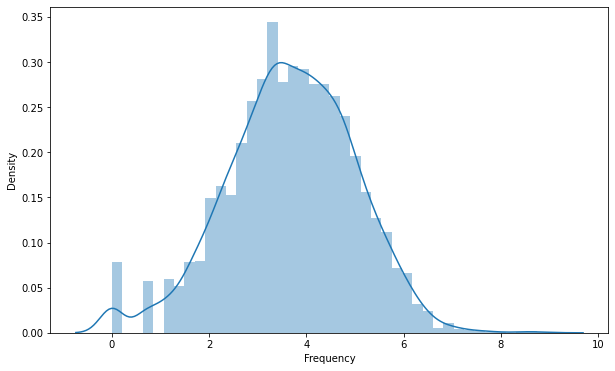

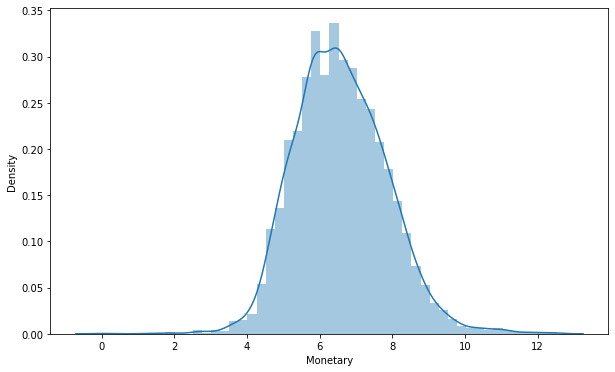

In [44]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,6))
sns.distplot(Recency_Plot)

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(Frequency_Plot)

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(Monetary_Plot)

#**Split into four segments using quantiles**

In [45]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [46]:
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

In [47]:
#Functions to create R, F and M segments
def RScoring(x,p,d):                      # everyday to come to store the best is the customer ,here 1 is best and 4 is worst
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):                    # the higher the product purchasing is the best customer, here 4 is worst and 1 is best
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [48]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [49]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


# Modelling

#**K-Means Clustering**

#**Applying Silhouette Score Method**

In [50]:
# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score


# Creating an instance of the model
kmeans = KMeans()

## ELBOW METHOD

In [51]:
# Using the elbow method to find out optimum number of clusters, with different metrics
def elbow_method(X):
  ''' Displays elbow curves with different metrics '''
  
  metrics = ['distortion', 'calinski_harabasz', 'silhouette']
  
  for m in metrics:
    visualizer = KElbowVisualizer(kmeans, k = (2,10), metric = m)
    visualizer.fit(X)
    visualizer.poof()

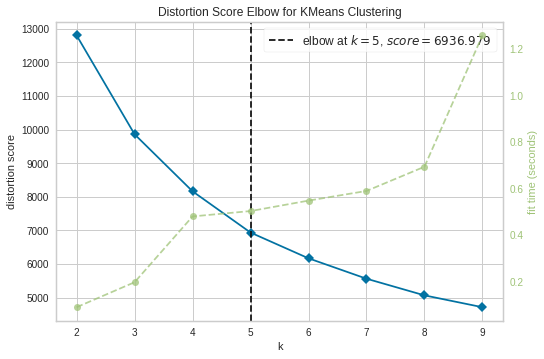

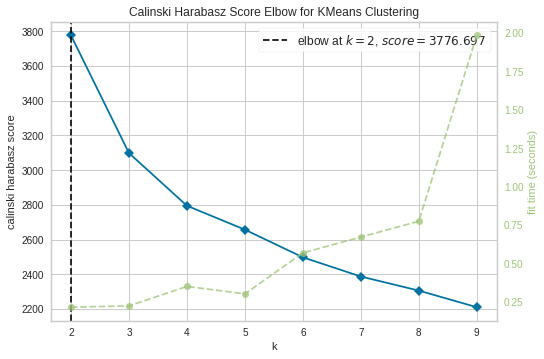

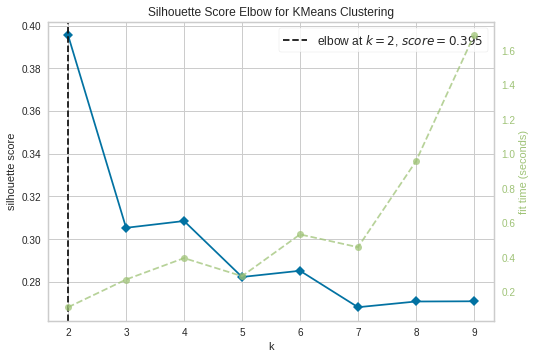

In [52]:
# Using the elbow method function to understand optimum number of clusters
elbow_method(Log_Tfd_Data)

## Silhouette Analysis

In [53]:
#Creating a function to calculate silhouette scores

def sil_score(input, k):
  ''' Returns a dataframe with sillhouette scores of different clusters in the data '''
  
  sil_df = pd.DataFrame(columns = ['Clusters', 'Silhouette Score'])
  
  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(input)
    score = silhouette_score(input, labels)
    sil_df = sil_df.append({'Clusters' : i,
                            'Silhouette Score' : score}, ignore_index = True)
  
  return sil_df

#**Calculation of Silhouette score**

### Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* ### Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
* ### Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

### The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

In [54]:
#display silhoutte scores at different number of clusters
sil_score(Log_Tfd_Data,10)

,Clusters,Silhouette Score
0,2.0,0.395429
1,3.0,0.305811
2,4.0,0.308034
3,5.0,0.282247
4,6.0,0.285248
5,7.0,0.270522
6,8.0,0.268096
7,9.0,0.270472
8,10.0,0.263666


In [55]:
# Creating a function for silhouette
def sil_visual(input, k):
  ''' Visualize the silhouette plot with different clusters'''

  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(input)
    visualizer.poof()

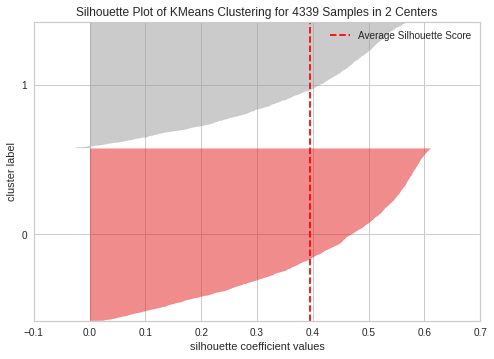

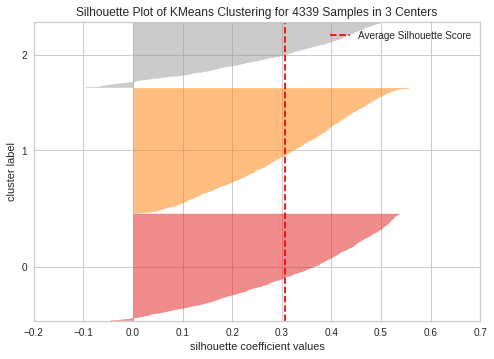

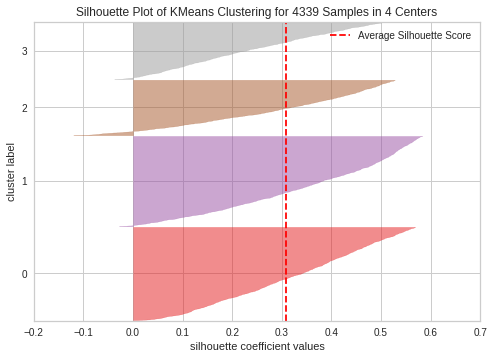

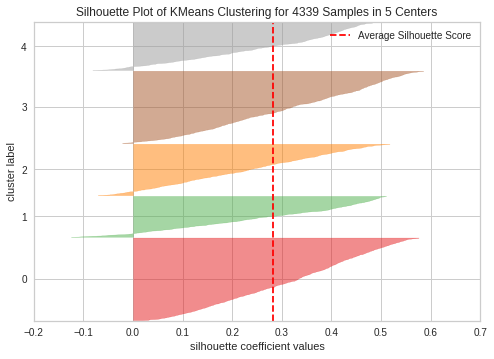

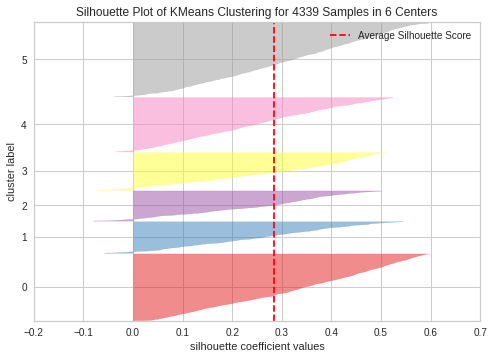

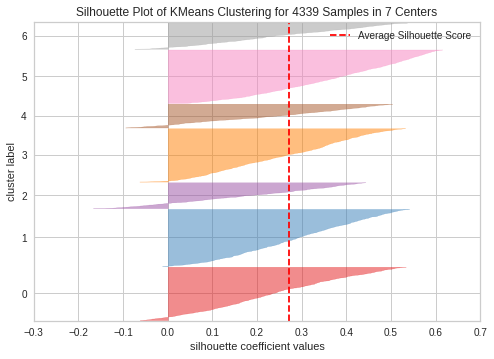

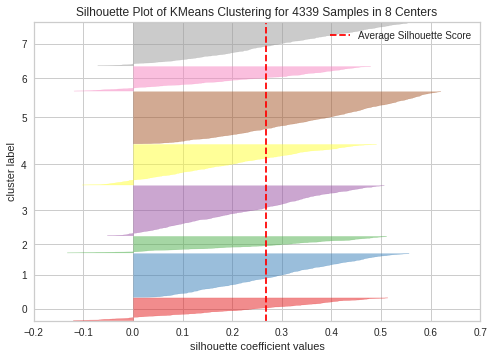

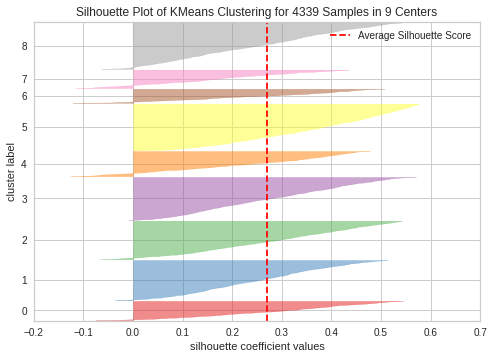

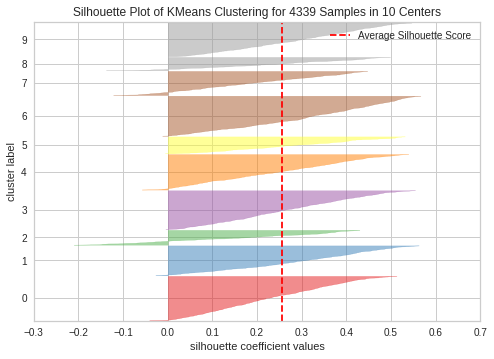

In [56]:
sil_visual(Log_Tfd_Data, 10)

In [57]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=10)
# Fitting the model to the data
kmeans.fit(Log_Tfd_Data)

KMeans(n_clusters=3, random_state=10)

In [58]:
# Creating a copy of the rfm dataframe
rfm_df_copy = rfm_df.copy()

In [59]:
# Creating cluster labels for the data and appending it to the RFM dataframe
labels = kmeans.predict(Log_Tfd_Data)
rfm_df_copy['Cluster'] = labels

In [60]:
rfm_df_copy.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,2
12347.0,2,182,4310.00,1,1,1,111,3,1
12348.0,75,31,1797.24,3,3,1,331,7,2
12349.0,18,73,1757.55,2,2,1,221,5,2
12350.0,310,17,334.40,4,4,3,443,11,0


# Cluster Profiling

In [61]:
# Grouping by clusters to understand the profiles
rfm_df_copy.groupby('Cluster').mean()

,Recency,Frequency,Monetary,R,F,M,RFMScore
Cluster,,,,,,,
0,171.570972,15.411765,303.994738,3.354220,3.621483,3.555627,10.531330
1,9.492693,248.536534,6304.337672,1.160752,1.384134,1.360125,3.905010
2,67.128233,71.838195,1305.562264,2.456247,2.152449,2.192625,6.801321


In [62]:
# Number of customers belonging to each cluster
rfm_df_copy['Cluster'].value_counts()

2    1817
0    1564
1     958
Name: Cluster, dtype: int64

**Cluster 0** : comprises of customers who are very recent, frequent and also contribute largely to the sales.

**Cluster 1** : comprises of customers who are moderately recent, frequent and contribute an average amount to sales

**Cluster 2** : comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company.

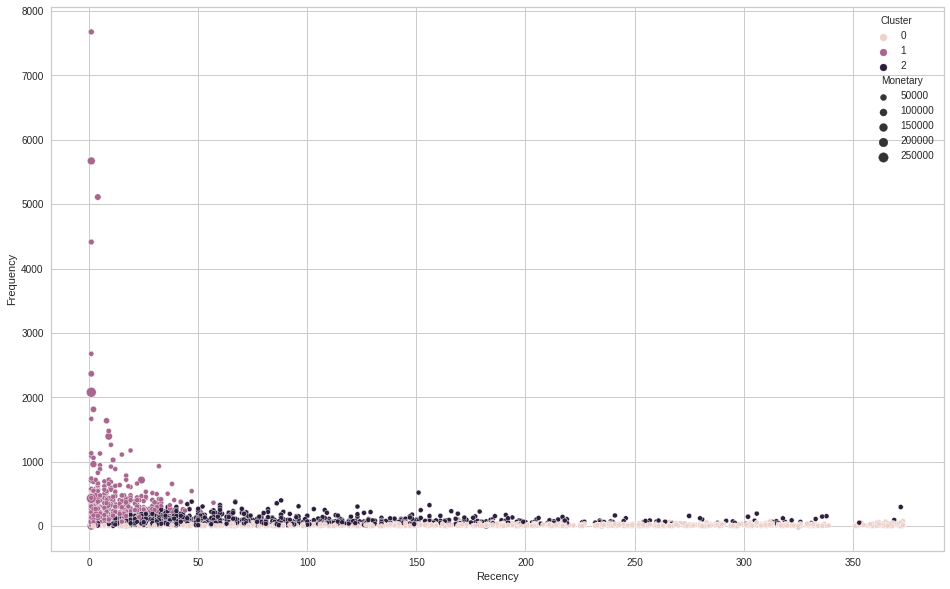

In [63]:
# Creating a scatter plot to understand the clusters visually
plt.figure(figsize = (16,10))
sns.scatterplot(x = rfm_df_copy['Recency'], y = rfm_df_copy['Frequency'], size= rfm_df_copy['Monetary'], hue = rfm_df_copy['Cluster'])

#**Dendrogram to find the optimal number of clusters**

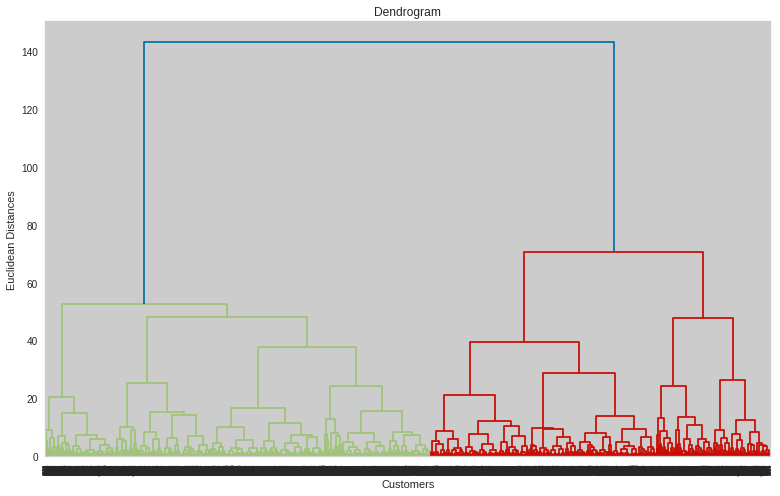

In [64]:
# Using the Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(Log_Tfd_Data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

# CONCLUSION
- Various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values to feature modifications.     

  Next, we did some EDA and tried to draw observations from the features we had in the dataset.
- we saw how we can segment our customer depending on our business requirements

- RFM(Recency, Frequency and Monetary) dataframe ease our problem to solve in a particular order, it makes easy to recommend and display new launched products to few customers.RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers based on their interest.

- Used cluster profiling the average of recency, frequency and monetary values for each customer segment was identified.

- Used the K-means algorithm to segment our customer in various clusters having similar similarity